# Automatic Blog Post creator

In this project we will build a blog poster that writes a blog post given something to talk about or discuss. Additionally, a charming cover photo will be created!

## Library Imports

In [1]:
import os
import requests
import shutil
from PIL import Image

import openai

## OpenAI API

In [8]:
openai.api_key = os.getenv("OPENAI_API_KEY")

### Telling GPT to generate a Blog Post

#### Prompt Tuning
To get the best out of GPT, we should inform it about our biography and give some hints about the blogpost. We directly assign a nice and catching title

Jose's Website
 
 Biography
 I am a Python instructor teaching people machine learning!


 Blog

 Jan 31, 2023
 Title: Why AI will never replace the radiologist
 tags: tech, machine-learning, radiology
 Summary:  I talk about the cons of machine learning in radiology. I explain why I think that AI will never replace the radiologist.
 Full text:

In [10]:
# function to create the prompt
def create_prompt(title):
    prompt = f"""Suvo's Website

Biography
I am a machine learning and data scientist! 

Blog
Jan 31, 2023 Title: {title} 
tags: tech, machine-learning, radiology 
Summary: I talk about the cons of machine learning in radiology. I explain why I think that AI will never replace the radiologist. 
Full text: """
    return prompt
    

In [11]:
title = "Why AI will never replace the Radiologist ?"
print(create_prompt(title))

Suvo's Website

Biography
I am a machine learning and data scientist! 

Blog
Jan 31, 2023 Title: Why AI will never replace the Radiologist ? 
tags: tech, machine-learning, radiology 
Summary: I talk about the cons of machine learning in radiology. I explain why I think that AI will never replace the radiologist. 
Full text: 


#### OpenAI API Call

In [12]:
response = openai.Completion.create(engine='text-davinci-003',
                                    prompt = create_prompt(title),
                                    max_tokens = 512,  # increase the token to get a longer blog post
                                    temperature = 0.7)
response

<OpenAIObject text_completion id=cmpl-86HcQ6iZlLGIp9MziMklwCbqclHYh at 0x109922ab0> JSON: {
  "warning": "This model version is deprecated. Migrate before January 4, 2024 to avoid disruption of service. Learn more https://platform.openai.com/docs/deprecations",
  "id": "cmpl-86HcQ6iZlLGIp9MziMklwCbqclHYh",
  "object": "text_completion",
  "created": 1696508386,
  "model": "text-davinci-003",
  "choices": [
    {
      "text": "\n\nAs a machine learning and data scientist, I have thought a lot about how AI can be used to improve various medical fields. One field that I am particularly interested in is radiology, as it is an area in which AI can potentially be used to diagnose and interpret medical images quickly and accurately. However, despite the potential of AI to revolutionize radiology, I don\u2019t think it will ever replace the radiologist.\n\nThe first reason why AI will never replace the radiologist is that AI is still limited in its ability to recognize patterns in medical ima

In [13]:
blog_content = response['choices'][0]['text']
print(blog_content)



As a machine learning and data scientist, I have thought a lot about how AI can be used to improve various medical fields. One field that I am particularly interested in is radiology, as it is an area in which AI can potentially be used to diagnose and interpret medical images quickly and accurately. However, despite the potential of AI to revolutionize radiology, I don’t think it will ever replace the radiologist.

The first reason why AI will never replace the radiologist is that AI is still limited in its ability to recognize patterns in medical images. AI algorithms are very good at recognizing simple patterns, such as distinguishing between different types of tumors, but it is much more difficult for them to recognize more complex patterns, such as subtle differences in tissue texture or the presence of subtle lesions. This means that while AI can be used to detect potential problems, only a human radiologist can interpret the images correctly and diagnose the patient accurately

#### DALLE2 prompt

In [14]:
def dalle2_prompt(img_title):
    prompt = f"Pixel art showing '{img_title}'"
    return prompt

In [15]:
image_prompt = dalle2_prompt(title)
print(image_prompt)

Pixel art showing 'Why AI will never replace the Radiologist ?'


In [16]:
response = openai.Image.create(
    prompt = image_prompt,
    n = 1,
    size = "512x512"
)
response

<OpenAIObject at 0x107a62210> JSON: {
  "created": 1696508920,
  "data": [
    {
      "url": "https://oaidalleapiprodscus.blob.core.windows.net/private/org-sVuYSPcznA6bMq4ub2FKJWEb/user-26j8emmFLIbG7IeAVObdjFAO/img-uqzciDbF75uUS5CNsi510i81.png?st=2023-10-05T11%3A28%3A40Z&se=2023-10-05T13%3A28%3A40Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-10-05T04%3A33%3A01Z&ske=2023-10-06T04%3A33%3A01Z&sks=b&skv=2021-08-06&sig=7PdXxbk1F/NqqTp8o5XAOdzYMRAj5oFEiw3hyTGWHtA%3D"
    }
  ]
}

In [17]:
image_url = response['data'][0]['url']
print(image_url)

https://oaidalleapiprodscus.blob.core.windows.net/private/org-sVuYSPcznA6bMq4ub2FKJWEb/user-26j8emmFLIbG7IeAVObdjFAO/img-uqzciDbF75uUS5CNsi510i81.png?st=2023-10-05T11%3A28%3A40Z&se=2023-10-05T13%3A28%3A40Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-10-05T04%3A33%3A01Z&ske=2023-10-06T04%3A33%3A01Z&sks=b&skv=2021-08-06&sig=7PdXxbk1F/NqqTp8o5XAOdzYMRAj5oFEiw3hyTGWHtA%3D


In [18]:
def save_image(image_url, file_name):
    image_res = requests.get(image_url, stream=True)
    
    if image_res.status_code == 200:
        with open(file_name, 'wb') as f:
            shutil.copyfileobj(image_res.raw, f)
    else:
        print("Error Downloading image!!")
    return image_res.status_code

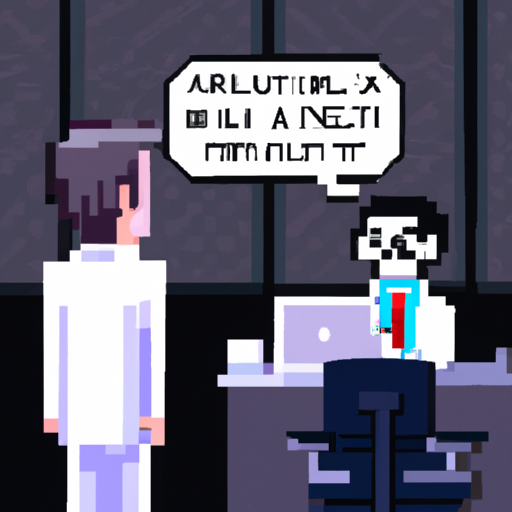

In [23]:
save_path = "blog.png"
save_image(image_url, save_path)
Image.open(save_path)